In [59]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, Normalizer

In [60]:
# Define Paths

path="C:/Users/aloe8475/Documents/GitHub/CODE/Adrian's Code/NETWORK_sims_2/Saved Networks/Simulations Only/Python Data/"
save_path='C:/Users/aloe8475/Documents/GitHub/CODE/Data/Figures/SVM/'

test_num='5'
filename_test = path+ 'Net_Sx_20_NoW500_03_30-2019_11_16_59_Zdenka_Square_1SimsOnly_20_Sec_4Electrodes_Vmax_0.25_Testing Simulation_' + test_num +'_11-Jun-2019_ForPython.mat'
filename_test_save='Testing Simulation_' + test_num + '_11-Jun-2019'

filename_train = path + 'Net_Sx_20_NoW500_03_30-2019_11_16_59_Zdenka_Square_1SimsOnly_20_Sec_4Electrodes_Vmax_0.25_Training Simulation_1_11-Jun-2019_ForPython.mat'
filename_train_save='Training Simulation_1_11-Jun-2019'
# filename = 'Alon_Code/Data/Testing/Extracted_test_2.mat'

In [61]:
# Load the Training data

data = loadmat(filename_train)

IDrain = data['IDrain']#.todense()
VSource = data['VSource']
IDrain1_Train=IDrain[:,0].todense()
IDrain2_Train=IDrain[:,1].todense()
VSource1_Train=VSource[:,0]
VSource2_Train=VSource[:,1]



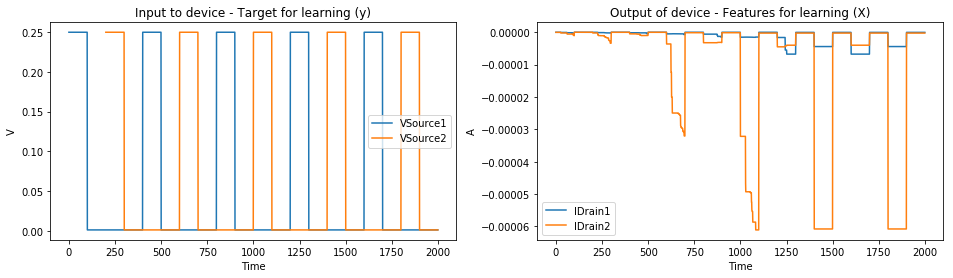

In [62]:
# Explore
fig, axes = plt.subplots(1, 2, figsize=(16, 4))

axes[0].plot(VSource1_Train, label = 'VSource1'); axes[0].plot(VSource2_Train, label = 'VSource2')
axes[0].set_title("Input to device - Target for learning (y)"); axes[0].set_xlabel('Time'); axes[0].set_ylabel('V')
axes[0].legend()
axes[1].plot(IDrain1_Train, label = 'IDrain1'); axes[1].plot(IDrain2_Train, label = 'IDrain2')
axes[1].set_title("Output of device - Features for learning (X)"); axes[1].set_xlabel('Time'); axes[1].set_ylabel('A')
axes[1].legend()

fig.savefig(save_path + filename_train_save + '_Training_Parameters.jpg')
fig.savefig(save_path + filename_train_save + '_Training_Parameters.eps')

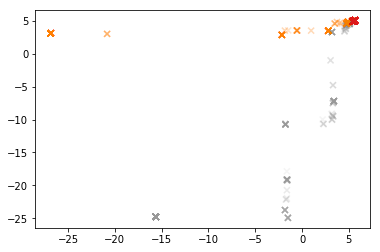

In [63]:
# Split the data
start_time = 0
X = np.hstack([IDrain1_Train, IDrain2_Train])[start_time:]
y = VSource1_Train[start_time:].ravel()
y = (y == y.max())
y2 = VSource2_Train[start_time:].ravel()
y2 = (y2 == np.nanmax(y2)) * 2
y = y + y2

# X[:,1] = X[:,1] / X[:,0]
# scalar = StandardScaler()
# scalar = Normalizer(norm = 'l2')
# X = scalar.fit_transform(X)
# X = (X - X.mean(axis = 0)) / X.std(axis = 0)
X = (X - X.mean(axis = 0)) / X.std(axis = 0)
# X = (X - X.mean(axis = 1)) / X.std(axis = 1)
X = np.asarray(X) * 10

# sns.kdeplot(X[:,0][y], X[:,1][y])
# sns.kdeplot(X[:,0][~y], X[:,1][~y])

plt.scatter(X[:,0], X[:,1], c = y, marker = 'x', cmap = 'Set1', alpha = 0.1)

In [64]:
# Training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0, random_state = 0)

clf = SVC(kernel = 'linear', C = 0.5, probability = True).fit(X_train, y_train)
# clf2 = LinearDiscriminantAnalysis().fit(X_train, y_train)
# clf = RandomForestClassifier().fit(X_train, y_train)

# y_pred = clf.predict(X_test)

# print('Test accuracy:', clf.score(X_test, y_test))

In [65]:
# y_pred

In [66]:
# clf.predict_proba(X_test)

In [67]:
# Plot
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

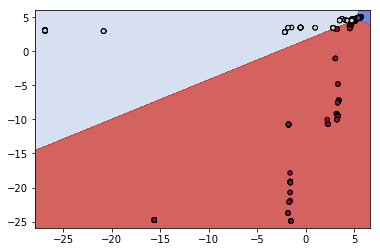

In [68]:
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

fig, ax = plt.subplots()
plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

fig.savefig(save_path + filename_train_save + '_Training_Classification.jpg')
fig.savefig(save_path + filename_train_save + '_Training_Classification.eps')


In [69]:
# Load the test data
data_test = loadmat(filename_test)

In [70]:
IDrain = data_test['IDrain']#.todense()
VSource = data_test['VSource']
IDrain1_Test=IDrain[:,0].todense()
IDrain2_Test=IDrain[:,1].todense()
VSource1_Test=VSource[:,0]
VSource2_Test=VSource[:,1]

In [71]:
new_start_time = 0
X_test = np.hstack([IDrain1_Test, IDrain2_Test])[new_start_time:]

# X[:,1] = X[:,1] / X[:,0]
# X_test = scalar.transform(X_test)
# scalar = Normalizer(norm = 'l1')
# X_test = scalar.transform(X_test)
# X_test = (X_test - X_test[start_time:].mean(axis = 0)) / X_test[start_time:].std(axis = 0)
# X_test = (X_test - X_test.mean(axis = 1)) / X_test.std(axis = 1)

X_test = (X_test - X_test.mean(axis = 0)) / X_test.std(axis = 0)
# X = (X - X.mean(axis = 1)) / X.std(axis = 1)
X_test = np.asarray(X_test) * 10

y = VSource1_Test[new_start_time:].ravel()
y = (y == y.max())
y2 = VSource2_Test[new_start_time:].ravel()
y2 = (y2 == np.nanmax(y2)) * 2
y_test = y + y2

y_pred = clf.predict(X_test)

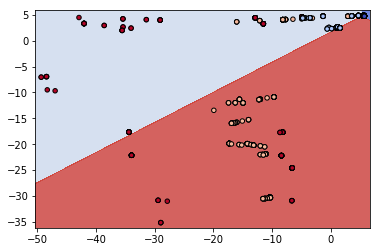

In [72]:
X0, X1 = X_test[:, 0], X_test[:, 1]
xx, yy = make_meshgrid(X0, X1)

fig, ax = plt.subplots()
plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y_test, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

fig.savefig(save_path + filename_train_save + '_' + filename_test_save + '_Testing_Classification.jpg')
fig.savefig(save_path + filename_train_save + '_' + filename_test_save + '_Testing_Classification.eps')

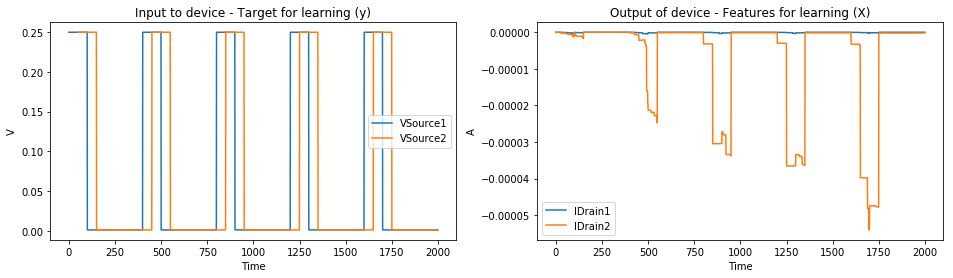

In [73]:
# Explore
fig, axes = plt.subplots(1, 2, figsize=(16, 4))

axes[0].plot(VSource1_Test, label = 'VSource1'); axes[0].plot(VSource2_Test, label = 'VSource2')
axes[0].set_title("Input to device - Target for learning (y)"); axes[0].set_xlabel('Time'); axes[0].set_ylabel('V')
axes[0].legend()
axes[1].plot(IDrain1_Test, label = 'IDrain1'); axes[1].plot(IDrain2_Test, label = 'IDrain2')
axes[1].set_title("Output of device - Features for learning (X)"); axes[1].set_xlabel('Time'); axes[1].set_ylabel('A')
axes[1].legend()

fig.savefig(save_path + filename_train_save + '_' + filename_test_save + '_Testing_Parameters'+ '.jpg')
fig.savefig(save_path + filename_train_save + '_' + filename_test_save + '_Testing_Parameters.eps')

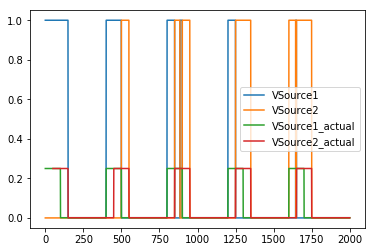

In [74]:
plt.plot(y_pred == 1, label = 'VSource1')
plt.plot(y_pred == 2, label = 'VSource2')
plt.plot(VSource1_Test, label = 'VSource1_actual')
plt.plot(VSource2_Test, label = 'VSource2_actual')
plt.legend()
plt.savefig(save_path + filename_train_save + '_' + filename_test_save + '_SVM Prediction' +'.jpg')
plt.savefig(save_path + filename_train_save + '_' + filename_test_save + '_SVM Prediction.eps')